In [30]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
dataset = pd.read_csv('winequality-red.csv')
dataset.shape
dataset.head()

,acidez_fixa,acidez_volatil,acido_citrico,acucar_residual,cloretos,dioxido_enxofre_livre,dioxido_enxofre_total,densidade,ph,sulfato,alcool,qualidade
0,7.4,0.70,0.00,1.9,76.0,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,98.0,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,92.0,15.0,54.0,997.0000,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,75.0,17.0,60.0,998.0000,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,76.0,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [31]:
dataset.describe()

,acidez_fixa,acidez_volatil,acido_citrico,acucar_residual,cloretos,dioxido_enxofre_livre,dioxido_enxofre_total,densidade,ph,sulfato,alcool,qualidade
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,84.830550,0.270976,2.538806,57.179161,15.874922,46.467792,52.086319,3.311113,0.658149,10.422983,5.636023
std,1.741096,234.417251,0.194801,1.409928,56.377136,10.460157,32.895324,219.813666,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.041000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.400000,0.090000,1.900000,0.090000,7.000000,22.000000,0.995620,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,68.000000,14.000000,38.000000,0.996800,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.660000,0.420000,2.600000,83.000000,21.000000,62.000000,0.998145,3.400000,0.730000,11.100000,6.000000
max,15.900000,1185.000000,1.000000,15.500000,611.000000,72.000000,289.000000,1001.000000,4.010000,2.000000,14.900000,8.000000


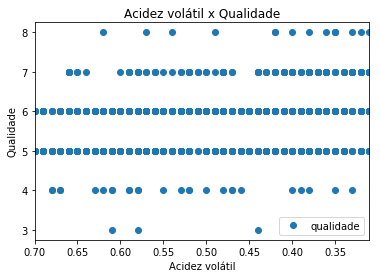

In [33]:
dataset.plot(x='acidez_volatil', y='qualidade', style='o')
plt.title('Acidez volátil x Qualidade')
plt.xlabel('Acidez volátil')
plt.ylabel('Qualidade')
plt.show()

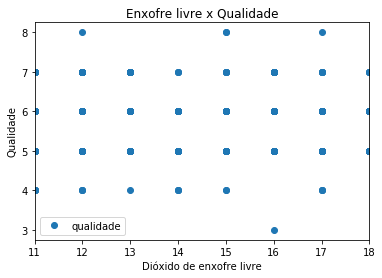

In [32]:
dataset.plot(x='dioxido_enxofre_livre', y='qualidade', style='o')  
plt.title('Enxofre livre x Qualidade')  
plt.xlabel('Dióxido de enxofre livre')  
plt.ylabel('Qualidade')  
plt.show()  

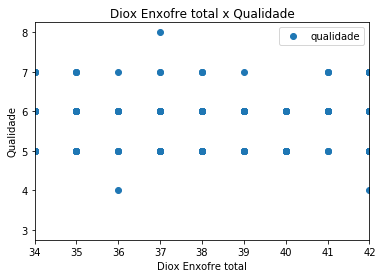

In [34]:
dataset.plot(x='dioxido_enxofre_total', y='qualidade', style='o')
plt.title('Diox Enxofre total x Qualidade')
plt.xlabel('Diox Enxofre total')
plt.ylabel('Qualidade')
plt.show()

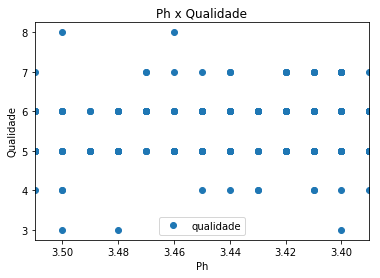

In [35]:
dataset.plot(x='ph', y='qualidade', style='o')
plt.title('Ph x Qualidade')
plt.xlabel('Ph')
plt.ylabel('Qualidade')
plt.show()

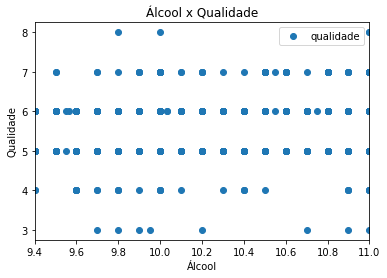

In [36]:
dataset.plot(x='alcool', y='qualidade', style='o')
plt.title('Álcool x Qualidade')
plt.xlabel('Álcool')
plt.ylabel('Qualidade')
plt.show()

In [54]:
X = dataset[['acidez_fixa', 'acidez_volatil', 'acido_citrico', 'acucar_residual', 'cloretos', 'dioxido_enxofre_livre',
       'dioxido_enxofre_total', 'densidade', 'ph', 'sulfato', 'alcool']]
y = dataset['qualidade']

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression() 
regressor.fit(X_train, y_train)
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
acidez_fixa,-0.024488
acidez_volatil,-0.000340
acido_citrico,0.554713
acucar_residual,0.013643
cloretos,-0.001046
dioxido_enxofre_livre,0.003581
dioxido_enxofre_total,-0.004021
densidade,-0.000183
ph,-0.505581
sulfato,0.778050


In [55]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
1109,6,5.846410
1032,5,5.246144
1002,7,6.360737
487,6,5.328660
979,5,5.880756
1054,6,5.135403
542,5,5.420751
853,6,5.983408
1189,4,4.862494
412,5,4.995424


In [56]:
from sklearn import metrics  
print('Taxa de erro:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Taxa de erro: 0.66211415603
